In [2]:
import pandas as pd

pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
pd.set_option('display.max_rows', None)



df1 = pd.read_csv("../data/procecessed_file/chat_data_2023_02_06_Tottenham_Manchester_n_t.csv", index_col=0)
df2 =pd.read_csv("../data/procecessed_file/chat_data_2023_02_20_Tottenham_WestHam_n_t.csv", index_col=0)
df3 =pd.read_csv("../data/procecessed_file/chat_data_2023_03_19_Tottenham_Southhampton_n_t.csv", index_col=0)
df4 =pd.read_csv("../data/procecessed_file/chat_data_2023_03_24_Korea_Colombia_corrected_n_t.csv", index_col=0)
df5 =pd.read_csv("../data/procecessed_file/chat_data_2023_04_04_Everton_Tottenhan_corrected_n_t.csv", index_col=0)

df = pd.concat([df1, df2, df3, df4, df5])
df = df.drop(0)
print(df.head())
print(len(df))

          id                      comment                 time  \
1   Hyun Kim                        안녕하세요  2023-02-06 01:16:47   
2  식스맨TV축구해설                    안녕하세요~~^^  2023-02-06 01:17:05   
3    사빌sable                        안녕하세요  2023-02-06 01:18:16   
4    DDandME                식스맨님 항상 고맙습니다  2023-02-06 01:18:47   
5        황박연  울 식스맨님~~~~~~~~~~~~~~~~~~^^*  2023-02-06 01:18:55   

  corrected_comment              nouns  time_minutes  
1             안녕하세요                 []         4.300  
2             안녕하세요                 []         4.600  
3             안녕하세요                 []         5.783  
4     식스맨님 항상 고맙습니다  ['식스', '맨', '항상']         6.300  
5            울 식스맨님   ['울', '식스', '맨']         6.433  
25011


In [3]:
import ast
df["nouns"] = df["nouns"].apply(lambda x: ast.literal_eval(x))
df.head()

,id,comment,time,corrected_comment,nouns,time_minutes
1,Hyun Kim,안녕하세요,2023-02-06 01:16:47,안녕하세요,[],4.300
2,식스맨TV축구해설,안녕하세요~~^^,2023-02-06 01:17:05,안녕하세요,[],4.600
3,사빌sable,안녕하세요,2023-02-06 01:18:16,안녕하세요,[],5.783
4,DDandME,식스맨님 항상 고맙습니다,2023-02-06 01:18:47,식스맨님 항상 고맙습니다,"[식스, 맨, 항상]",6.300
5,황박연,울 식스맨님~~~~~~~~~~~~~~~~~~^^*,2023-02-06 01:18:55,울 식스맨님,"[울, 식스, 맨]",6.433


In [4]:
game_nouns_list=[]
for list in df["nouns"]:
    game_nouns_list.extend(list)

print(game_nouns_list)


['식스', '맨', '항상', '울', '식스', '맨', '꾹', '방가', '방가', '울', '유미', '또', '박연', '모자', '울', '식스', '맨', '요즘', '우레이', '날', '두보', '나은', '거', '걘', '인성', '지하', '또', '해트트릭', '골', '성원', '장님', '방가', '방가', '어서', '울', '김', '나야', '식스', '맨', '오늘', '캐나다', '가즈', '또', '봬', '어서', '오늘', '부디', '동우', '어서', '네', '울', '유미', '황', '박연', '손흥민', '파이팅', '리하', '울', '윤정숙', '어서', '윤정숙', '어서', '구독', '클릭', '클릭', '박연', '만이', '식스', '맨', '꾹', '울', '김', '나야', '님', '새삼', '구독', '클릭', '클릭', '오늘', '파이팅', '구독', '클릭', '클릭', '손흥민', '선수', '파이팅', '구독', '식스', '맨', '힘', '사랑', '한빛', '어서', '황', '박연', '마야', '파이팅', '오늘', '김민재', '이강인', '어제', '또', '황민', '찬위', '손흥민', '승리', '울', '윤정숙', '늘', '지민', '울', '김지민', '후반', '포로', '애', '좀', '일찍', '중계', '시작', '제일', '사자왕', '어서', '만', '구독', '클릭', '클릭', '승리', '희망', '울', '김지민', '늘', '사랑', '거', '아시', '구독', '클릭', '클릭', '안', '자고', '지민', '지민', '제로', '타깃', '입장', '구독', '클릭', '클릭', '찬', '부상', '걱정', '요', '지민', '사진', '구독', '클릭', '클릭', '은정', '어서', '식스', '맨', '파이팅', '출첵', '이모티콘', '잘못', '죄송', '제로', '타겟', '페리', '선발', '토트넘', 

In [5]:
# 전체 경기 단어 카운트

from collections import Counter
counts = Counter(game_nouns_list)
print(counts)
print(len(counts))

Counter({'골': 2680, '페리': 1752, '손흥민': 1289, '오늘': 950, '안': 877, '케인': 820, '토트넘': 809, '식스': 639, '맨': 633, '흥민': 609, '경기': 599, '거': 575, '손': 535, '왜': 524, '콩테': 489, '호': 474, '선수': 422, '좀': 422, '치': 421, '파이팅': 407, '중계': 394, '진짜': 385, '부상': 365, '어서': 359, '수고': 351, '수비': 330, '더': 320, '응원': 318, '클릭': 312, '포로': 307, '듯': 306, '패스': 292, '제발': 292, '못': 291, '교체': 276, '또': 261, '가즈': 260, '것': 240, '이강인': 233, '때': 233, '이': 227, '팀': 224, '역시': 219, '구독': 217, '뭐': 215, '소니': 214, '보고': 214, '축구': 211, '게': 206, '로열': 203, '우리': 203, '저': 202, '요': 199, '감독': 190, '후반': 189, '어시': 184, '그냥': 184, '모우': 181, '히샬': 180, '누가': 177, '김민재': 174, '이제': 171, '수': 166, '놈': 164, '흥': 162, '해': 153, '콜롬비아': 153, '심판': 150, '카나': 149, '번': 146, '벤치': 143, '위': 142, '방가': 139, '선발': 138, '최고': 135, '민아': 134, '조선': 133, '오': 132, '로메': 131, '시간': 130, '욕심': 130, '정말': 129, '울': 126, '전': 125, '나폴리': 124, '볼': 123, '해설': 123, '채널': 123, '대한민국': 123, '나': 122, '맨시티': 122, '규': 121

In [6]:
# 단어 필터
# 등장횟수 20 이상인 것만, 1글자 제거(골 제외)

filtered_counts = {word: count for word, count in counts.items() if (count > 20 and (len(word)>1 or word == '골')) }

filtered_counts = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)
print(filtered_counts)
print(len(filtered_counts))

[('골', 2680), ('페리', 1752), ('손흥민', 1289), ('오늘', 950), ('케인', 820), ('토트넘', 809), ('식스', 639), ('흥민', 609), ('경기', 599), ('콩테', 489), ('선수', 422), ('파이팅', 407), ('중계', 394), ('진짜', 385), ('부상', 365), ('어서', 359), ('수고', 351), ('수비', 330), ('응원', 318), ('클릭', 312), ('포로', 307), ('패스', 292), ('제발', 292), ('교체', 276), ('가즈', 260), ('이강인', 233), ('역시', 219), ('구독', 217), ('소니', 214), ('보고', 214), ('축구', 211), ('로열', 203), ('우리', 203), ('감독', 190), ('후반', 189), ('어시', 184), ('그냥', 184), ('모우', 181), ('히샬', 180), ('누가', 177), ('김민재', 174), ('이제', 171), ('콜롬비아', 153), ('심판', 150), ('카나', 149), ('벤치', 143), ('방가', 139), ('선발', 138), ('최고', 135), ('민아', 134), ('조선', 133), ('로메', 131), ('시간', 130), ('욕심', 130), ('정말', 129), ('나폴리', 124), ('해설', 123), ('채널', 123), ('대한민국', 123), ('맨시티', 122), ('플레이', 118), ('강인', 114), ('한국', 113), ('시즌', 111), ('리스', 110), ('지금', 109), ('벤뎁', 109), ('공격', 107), ('시작', 106), ('민재', 106), ('하나', 102), ('쿠팡', 100), ('전반', 96), ('사람', 95), ('이적', 94), ('크로스', 93), 

stop_words 더 추가하기

In [7]:
# stop word 필터

stop_words = ['클릭', '방가', '방송', '유투브', '목소리', '티브이', '때문', '이기', '언제', '항상', '영상', '건가', '하나요',
              '일루', '자기', '시차', '가요', '일정', '하이', '후원', '화면', '이건', '유료', '나야', '거임', '저건']

filtered_counts_noStopwords = [(word, count) for word, count in filtered_counts if word not in stop_words]
print(filtered_counts_noStopwords)
print(len(filtered_counts_noStopwords))


[('골', 2680), ('페리', 1752), ('손흥민', 1289), ('오늘', 950), ('케인', 820), ('토트넘', 809), ('식스', 639), ('흥민', 609), ('경기', 599), ('콩테', 489), ('선수', 422), ('파이팅', 407), ('중계', 394), ('진짜', 385), ('부상', 365), ('어서', 359), ('수고', 351), ('수비', 330), ('응원', 318), ('포로', 307), ('패스', 292), ('제발', 292), ('교체', 276), ('가즈', 260), ('이강인', 233), ('역시', 219), ('구독', 217), ('소니', 214), ('보고', 214), ('축구', 211), ('로열', 203), ('우리', 203), ('감독', 190), ('후반', 189), ('어시', 184), ('그냥', 184), ('모우', 181), ('히샬', 180), ('누가', 177), ('김민재', 174), ('이제', 171), ('콜롬비아', 153), ('심판', 150), ('카나', 149), ('벤치', 143), ('선발', 138), ('최고', 135), ('민아', 134), ('조선', 133), ('로메', 131), ('시간', 130), ('욕심', 130), ('정말', 129), ('나폴리', 124), ('해설', 123), ('채널', 123), ('대한민국', 123), ('맨시티', 122), ('플레이', 118), ('강인', 114), ('한국', 113), ('시즌', 111), ('리스', 110), ('지금', 109), ('벤뎁', 109), ('공격', 107), ('시작', 106), ('민재', 106), ('하나', 102), ('쿠팡', 100), ('전반', 96), ('사람', 95), ('이적', 94), ('크로스', 93), ('퇴장', 93), ('포스터', 91), (

---

---

---

In [8]:

# 이중괄호 푸는 함수
def filtered_flatten(lst):
  result = []
  for item in lst:
    result.extend(item)
  return result


# 분 단위의 데이터로 만드는 함수 (grouped_df)
def df_processing(df):
  # 유효한 단어가 아니면 삭제하기(nouns_filtered)
  filtered_words = [word for word, count in filtered_counts_noStopwords]
  df['nouns_filtered'] = df['nouns'].apply(lambda x: [x for x in ast.literal_eval(x) if x in filtered_words])

  # time_minutes를 1분 간격으로 설정
  df['minutes'] = df['time_minutes'].apply(lambda x: int(x))
  # 동일한 분에 대한 데이터를 같은 행으로 처리하고 데이터를 리스트로 그룹화
  grouped_df = df.groupby('minutes').agg({
      'id': lambda x: x.tolist(),
      'comment': lambda x: x.tolist(),
      'time': lambda x: x.tolist(),
      'time_minutes' : lambda x: x.tolist(),
      'corrected_comment': lambda x: x.tolist(),
      'nouns': lambda x: x.tolist(),
      'nouns_filtered' :lambda x: x.tolist()
  }).reset_index()

  grouped_df["nouns_filtered_flatten"] = grouped_df["nouns_filtered"].apply(filtered_flatten)

  # 이벤트 시점 지정하기
  event_times = [time for x in real_event_times for time in (x, x+1, x+2)]

  for i, row in grouped_df.iterrows():
    if row["minutes"] in event_times:
      grouped_df.at[i, "event"] = 1
    else:
      grouped_df.at[i, "event"] = 0

  return grouped_df



# dtm 만드는 함수
# Bag of Words 모델을 구축
def dtm_df(grouped_df):

  # 전체 단어에 대한 인덱스를 구축
  global_word2index = {}
  for i, r in grouped_df.iterrows():
      for voca in r["nouns_filtered_flatten"]:
          if voca not in global_word2index:
              global_word2index[voca] = len(global_word2index)

  # 각 행에 대한 문서-단어 행렬을 생성
  dtm = []
  for i, r in grouped_df.iterrows():
      bow = [0] * len(global_word2index)  # 모든 단어에 대해 빈도수 0으로 초기화
      for voca in r["nouns_filtered_flatten"]:
          index = global_word2index[voca]  # 단어의 글로벌 인덱스
          bow[index] += 1  # 해당 인덱스의 빈도수 증가
      dtm.append(bow)

  # pandas DataFrame으로 변환
  dtm_df = pd.DataFrame(dtm, columns=[key for key, value in sorted(global_word2index.items(), key=lambda item: item[1])])

  return dtm_df

In [9]:
# 각 경기의 grouped_df, dtm_df 만들기

real_event_times = [123, 145]
grouped_df_5 = df_processing(df5)
dtm_df_5 = dtm_df(grouped_df_5)

real_event_times = [43, 80, 97, 100]
grouped_df_4 = df_processing(df4)
dtm_df_4 = dtm_df(grouped_df_4)

real_event_times = [101, 124, 142, 152, 155, 168]
grouped_df_3 = df_processing(df3)
dtm_df_3 = dtm_df(grouped_df_3)

real_event_times = [127, 143]
grouped_df_2 = df_processing(df2)
dtm_df_2 = dtm_df(grouped_df_2)

real_event_times = [32]
grouped_df_1 = df_processing(df1)
dtm_df_1 = dtm_df(grouped_df_1)

In [10]:
# 오즈비 구하는 함수
def odds_ratio_each(dtm_df, grouped_df):

  # 단어별 오즈비 구하기
  df_odds = pd.DataFrame()

  feature_names = dtm_df.columns.sort_values()
  df_odds['nouns'] = feature_names

  # sum_all = dtm.sum(axis=0).A1
  # df_odds['sum_all'] = sum_all

  df_odds['event_present'] = None
  df_odds['event_not_present'] = None
  df_odds['not_event_present'] = None
  df_odds['not_event_not_present'] = None


  # 이벤트가 있는 경우 각 명사가 포함된 행의 수를 계산
  df_odds['event_present'] = df_odds['nouns'].apply(
      lambda x: grouped_df[(grouped_df['event'] == 1) & (grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  df_odds['event_not_present'] = df_odds['nouns'].apply(
    lambda x: grouped_df[(grouped_df['event'] == 1) & (~grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  df_odds['not_event_present'] = df_odds['nouns'].apply(
      lambda x: grouped_df[(grouped_df['event'] == 0) & (grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  df_odds['not_event_not_present'] = df_odds['nouns'].apply(
    lambda x: grouped_df[(grouped_df['event'] == 0) & (~grouped_df['nouns_filtered_flatten'].apply(lambda y: x in y))].shape[0]
  )

  # import numpy as np
  # df_odds["sum"] = df_odds["event_present"] + df_odds["event_not_present"] + df_odds["not_event_present"] + df_odds["not_event_not_present"]


  odds_ratio = (df_odds["event_present"] * df_odds["not_event_not_present"]) / (df_odds["event_not_present"] * df_odds["not_event_present"]+ 0.0001)  # 분모가 0이 되는 것을 방지
  df_odds["odds_ratio"]  = np.log(odds_ratio.clip(lower=0.0001)) # 로그 계산 시 음수를 방지하기 위해 clip 사용
  df_odds = df_odds.sort_values(by = "odds_ratio", ascending = False)

  return df_odds

In [11]:
# 오즈비 구하기

import numpy as np

odds_ratio_5 = odds_ratio_each(dtm_df_5, grouped_df_5)
odds_ratio_4 = odds_ratio_each(dtm_df_4, grouped_df_4)
odds_ratio_3 = odds_ratio_each(dtm_df_3, grouped_df_3)
odds_ratio_2 = odds_ratio_each(dtm_df_2, grouped_df_2)
odds_ratio_1 = odds_ratio_each(dtm_df_1, grouped_df_1)


In [12]:
# event score 구하기

#event score 구하는 함수
def event_score(odds_ratio, dtm_df, grouped_df):

  # odds_ratio_1의 odds_ratio 열을  array로 변환
  odds_ratio_array = odds_ratio['odds_ratio'].values

  # 순서대로 정렬 : 오즈비 순으로
  dtm_df = dtm_df[odds_ratio["nouns"].to_list()]

  # odds_ratios 배열을 dtm_df_1의 각 열에 곱함
  mul_matrix = dtm_df.mul(odds_ratio_array, axis=1) # 행방향으로 곱해줌

  event_score = mul_matrix.sum(axis=1).array


  time = grouped_df["minutes"].array

  df_score = pd.DataFrame()
  df_score["time"] = time
  df_score["event_score"] = event_score

  return df_score


df_score_1 = event_score(odds_ratio_1, dtm_df_1, grouped_df_1)
df_score_2 = event_score(odds_ratio_2, dtm_df_2, grouped_df_2)
df_score_3 = event_score(odds_ratio_3, dtm_df_3, grouped_df_3)
df_score_4 = event_score(odds_ratio_4, dtm_df_4, grouped_df_4)
df_score_5 = event_score(odds_ratio_5, dtm_df_5, grouped_df_5)

In [13]:
# 상대출현빈도 event score 구하기

def relative_event_score(odds_ratio, dtm_df, grouped_df):

  # odds_ratio_1의 odds_ratio 열을  array로 변환
  odds_ratio_array = odds_ratio['odds_ratio'].values

  row_sum = dtm_df.sum(axis=1).array
  relative_dtm = dtm_df.div(row_sum, axis=0)


  # 순서대로 정렬 : 오즈비 순으로
  relative_dtm = relative_dtm[odds_ratio["nouns"].to_list()]

  # odds_ratios 배열을 relative_dtm_1의 각 열에 곱함
  mul_matrix = relative_dtm.mul(odds_ratio_array, axis=1) # 행방향으로 곱해줌

  event_score = mul_matrix.sum(axis=1).array


  time = grouped_df["minutes"].array

  df_score = pd.DataFrame()
  df_score["time"] = time
  df_score["event_score"] = event_score

  return df_score


relative_df_score_1 = relative_event_score(odds_ratio_1, dtm_df_1, grouped_df_1)
relative_df_score_2 = relative_event_score(odds_ratio_2, dtm_df_2, grouped_df_2)
relative_df_score_3 = relative_event_score(odds_ratio_3, dtm_df_3, grouped_df_3)
relative_df_score_4 = relative_event_score(odds_ratio_4, dtm_df_4, grouped_df_4)
relative_df_score_5 = relative_event_score(odds_ratio_5, dtm_df_5, grouped_df_5)

---

---

---

In [14]:
# 댓글 수 칼럼 추가(분 단위)

all_grouped_df = [grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]
for grouped_df in all_grouped_df:
  grouped_df["comment_cnt"] = grouped_df["comment"].apply(lambda x: len(x))
  

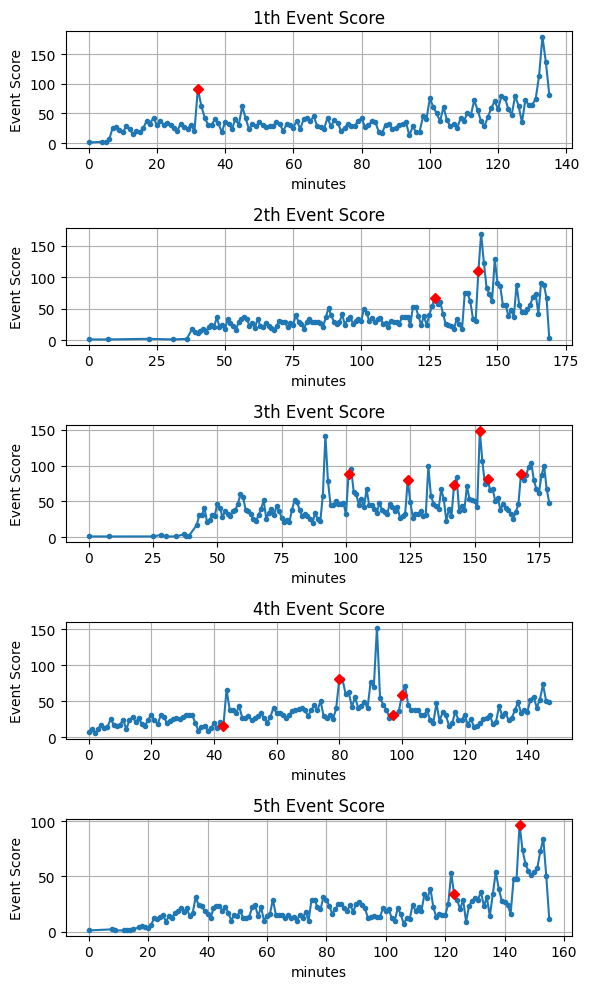

In [17]:
# 댓글 수 그래프 그리기

import matplotlib.pyplot as plt

# 모든 matplotlib 설정을 기본값으로 리셋
plt.rcParams.update(plt.rcParamsDefault)

# 5개의 데이터프레임에 대해 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 10))

for i, grouped_df in enumerate([grouped_df_1, grouped_df_2, grouped_df_3, grouped_df_4, grouped_df_5]):
  # 그래프 그리기
  axes[i].plot(grouped_df['minutes'], grouped_df['comment_cnt'], marker='o', linestyle='-', markersize =3)  # 선 그래프로 표현
  axes[i].set_title(f'{i+1}th Event Score')  # 그래프 제목 설정
  axes[i].set_xlabel('minutes')  # x축 레이블
  axes[i].set_ylabel('Event Score')  # y축 레이블
  axes[i].grid(True)  # 그리드 표시

  # 특정 축에 빨간색 다이아몬드 점 추가
  if i == 0:
      axes[i].plot([32], [grouped_df.loc[grouped_df['minutes'] == 32, 'comment_cnt'].iloc[0]],
                   marker='D', markersize=5, color='red', linestyle='')

  elif i == 1:
      axes[i].plot([127, 143], [grouped_df.loc[grouped_df['minutes'] == 127, 'comment_cnt'].iloc[0],
                                grouped_df.loc[grouped_df['minutes'] == 143, 'comment_cnt'].iloc[0]],
                   marker='D', markersize=5, color='red', linestyle='')

  elif i == 2:
      times = [101, 124, 142, 152, 155, 168]
      scores = [grouped_df.loc[grouped_df['minutes'] == time, 'comment_cnt'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

  elif i == 3:
      times = [43, 80, 97, 100]
      scores = [grouped_df.loc[grouped_df['minutes'] == time, 'comment_cnt'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

  elif i == 4:
      times = [123, 145]
      scores = [grouped_df.loc[grouped_df['minutes'] == time, 'comment_cnt'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

plt.tight_layout()  # subplot 간격 자동 조정
plt.show()  # 모든 그래프 보여주기

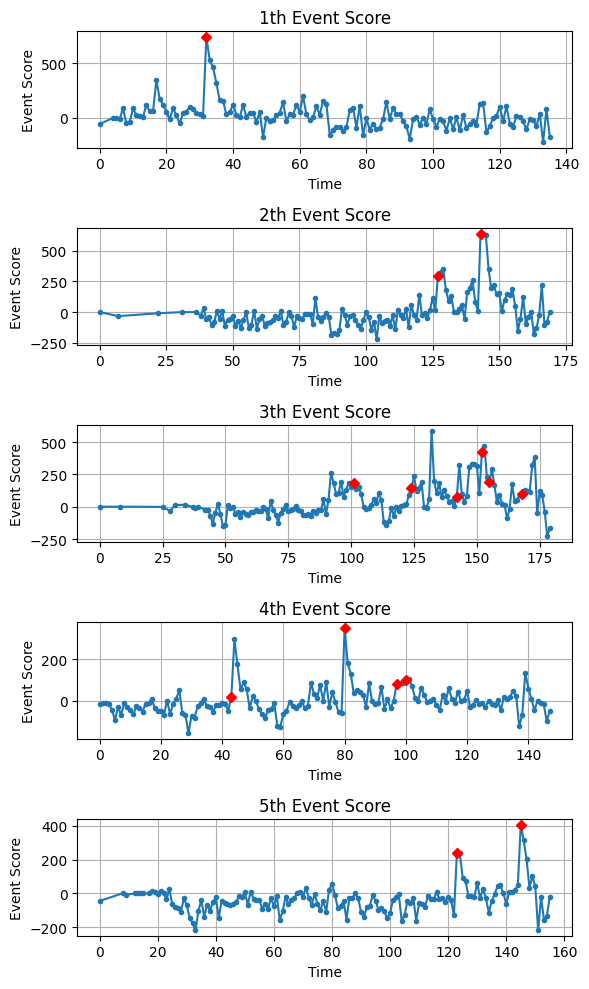

In [18]:
# 출현빈도 * 로그오즈비  그래프 그리기

import matplotlib.pyplot as plt

# 모든 matplotlib 설정을 기본값으로 리셋
plt.rcParams.update(plt.rcParamsDefault)

# 5개의 데이터프레임에 대해 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 10))

for i, df_score in enumerate([df_score_1, df_score_2, df_score_3, df_score_4, df_score_5]):
  # 그래프 그리기
  axes[i].plot(df_score['time'], df_score['event_score'], marker='o', linestyle='-', markersize =3)  # 선 그래프로 표현
  axes[i].set_title(f'{i+1}th Event Score')  # 그래프 제목 설정
  axes[i].set_xlabel('Time')  # x축 레이블
  axes[i].set_ylabel('Event Score')  # y축 레이블
  axes[i].grid(True)  # 그리드 표시

  # 특정 축에 빨간색 다이아몬드 점 추가
  if i == 0:
      axes[i].plot([32], [df_score.loc[df_score['time'] == 32, 'event_score'].iloc[0]],
                   marker='D', markersize=5, color='red', linestyle='')

  elif i == 1:
      axes[i].plot([127, 143], [df_score.loc[df_score['time'] == 127, 'event_score'].iloc[0],
                                df_score.loc[df_score['time'] == 143, 'event_score'].iloc[0]],
                   marker='D', markersize=5, color='red', linestyle='')

  elif i == 2:
      times = [101, 124, 142, 152, 155, 168]
      scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

  elif i == 3:
      times = [43, 80, 97, 100]
      scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

  elif i == 4:
      times = [123, 145]
      scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

plt.tight_layout()  # subplot 간격 자동 조정
plt.show()  # 모든 그래프 보여주기

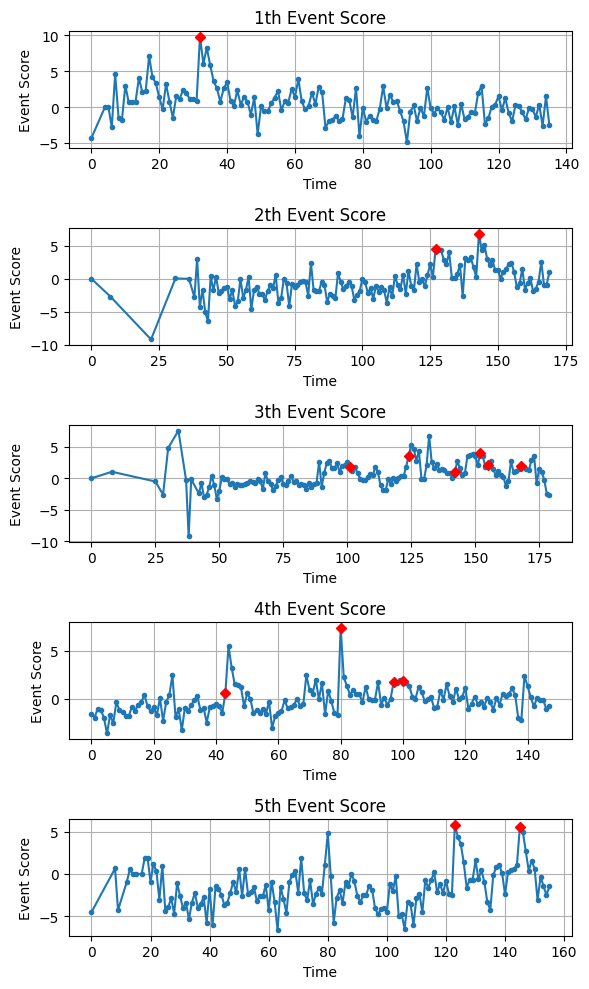

In [19]:
# 상대 출현빈도 * 로그오즈비  그래프 그리기

import matplotlib.pyplot as plt

# 모든 matplotlib 설정을 기본값으로 리셋
plt.rcParams.update(plt.rcParamsDefault)

# 5개의 데이터프레임에 대해 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 10))

for i, df_score in enumerate([relative_df_score_1, relative_df_score_2, relative_df_score_3, relative_df_score_4, relative_df_score_5]):
  # 그래프 그리기
  axes[i].plot(df_score['time'], df_score['event_score'], marker='o', linestyle='-', markersize =3)  # 선 그래프로 표현
  axes[i].set_title(f'{i+1}th Event Score')  # 그래프 제목 설정
  axes[i].set_xlabel('Time')  # x축 레이블
  axes[i].set_ylabel('Event Score')  # y축 레이블
  axes[i].grid(True)  # 그리드 표시

  # 특정 축에 빨간색 다이아몬드 점 추가
  if i == 0:
      axes[i].plot([32], [df_score.loc[df_score['time'] == 32, 'event_score'].iloc[0]],
                   marker='D', markersize=5, color='red', linestyle='')

  elif i == 1:
      axes[i].plot([127, 143], [df_score.loc[df_score['time'] == 127, 'event_score'].iloc[0],
                                df_score.loc[df_score['time'] == 143, 'event_score'].iloc[0]],
                   marker='D', markersize=5, color='red', linestyle='')

  elif i == 2:
      times = [101, 124, 142, 152, 155, 168]
      scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

  elif i == 3:
      times = [43, 80, 97, 100]
      scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

  elif i == 4:
      times = [123, 145]
      scores = [df_score.loc[df_score['time'] == time, 'event_score'].iloc[0] for time in times]
      axes[i].plot(times, scores, marker='D', markersize=5, color='red', linestyle='')

plt.tight_layout()  # subplot 간격 자동 조정
plt.show()  # 모든 그래프 보여주기

---